In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [53]:
def plot_decision_boundary(X, y_cat, model):
    x_span = np.linspace(min(X[:,0]) - 0.25, max(X[:,0]) + 0.25, 50)
    y_span = np.linspace(min(X[:,1]) - 0.25, max(X[:,1]) + 0.25, 50)
    
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    
    # slight changes from binary classification: use model.predict_classes
    # which is specifically for multiclass classifications
    pred_func = model.predict_classes(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

### Plotting the graphs

we can plot graphs of multiple classes using the scikit datasets.make_blobs() which will plot a cluster of graph based on the centers of the cluster (that will be defined in the variable "centers" below. 

To add more classes to the data, we just have to define more centers.

In [54]:
n_pts = 500

#define clusters for the blobs
centers = [[-1, 1], [-1, -1], [1, -1], [1, 1], [0, 0]]

# store data point to X and labels to y
X, y = datasets.make_blobs(n_samples = n_pts, random_state = 123, centers = centers, cluster_std = 0.4)
# when making the dataset, the multi class will initially 
# be labeled as "0", "1", and "2", we will then convert it to one hot encoding next.

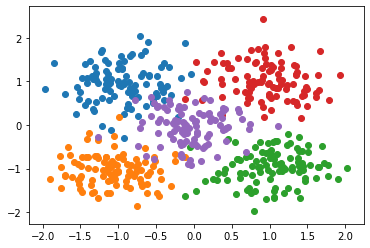

In [55]:
plt.scatter(X[y == 0, 0], X[y==0, 1])
plt.scatter(X[y == 1, 0], X[y==1, 1])
plt.scatter(X[y == 2, 0], X[y==2, 1])
plt.scatter(X[y == 3, 0], X[y==3, 1])
plt.scatter(X[y == 4, 0], X[y==4, 1])

### One hot encoding conversion:
Converts the labeled classes that was previously 0, 1, 2 into one hot encodings, such as [0, 0, 1], [0, 1, 0] and [0, 0, 1], which corresponds respectively to 0, 1, 2 (see comparison in the output below.).

The explanation above applies to only 3 classes, but more and more classes, like 5 classes would have one hot encodings such as [0, 0, 1, 0, 0], and so on..

In [56]:
y_cat = to_categorical(y, 5)
print(y)
print(y_cat)

[3 3 4 0 2 1 1 4 4 4 3 2 1 0 2 4 4 4 3 0 3 0 3 4 1 3 1 0 4 2 3 1 0 4 1 0 4
 0 4 0 1 3 3 0 3 1 3 4 0 4 0 2 3 0 2 4 4 0 3 4 1 3 0 4 2 1 1 2 3 2 3 2 1 1
 3 2 4 2 2 3 0 2 4 3 2 1 3 3 3 3 1 1 4 2 4 4 1 2 4 1 4 2 2 3 4 1 1 3 3 2 1
 3 1 0 1 0 4 4 4 3 1 3 3 3 1 4 4 0 2 0 1 1 0 4 0 1 1 4 4 0 4 3 4 4 2 4 0 0
 0 4 2 0 4 1 0 2 2 1 3 0 1 2 2 4 4 1 3 2 3 3 3 2 2 2 4 0 1 1 0 1 4 4 3 2 3
 2 3 1 0 3 4 2 1 0 0 0 4 3 0 4 2 2 3 1 0 4 4 1 2 1 3 1 4 4 0 1 4 2 4 0 4 0
 1 2 3 0 1 0 3 3 4 3 4 0 0 1 1 3 0 4 1 4 2 1 2 4 4 3 3 1 1 1 4 1 1 1 4 3 1
 0 0 2 2 2 3 2 3 4 2 3 3 1 1 0 4 0 3 0 0 0 3 2 2 1 4 2 0 0 2 2 1 3 3 1 3 0
 0 1 4 2 2 2 1 0 0 1 0 0 1 2 4 2 4 2 1 3 0 0 1 4 1 2 4 4 4 3 4 1 2 3 1 3 1
 0 0 2 4 1 3 1 1 2 1 4 3 1 2 3 2 0 4 1 4 0 2 2 0 1 2 2 4 4 0 4 1 3 3 2 2 0
 4 3 3 1 2 2 4 3 0 3 3 3 3 0 1 4 4 4 0 3 3 2 4 0 4 0 0 4 2 2 2 3 0 2 0 0 1
 2 3 0 0 2 4 2 3 0 3 0 1 0 4 1 0 0 1 3 1 4 0 2 1 1 3 2 3 2 2 2 3 1 0 0 0 1
 3 4 2 1 0 2 1 4 3 3 4 0 0 2 2 0 0 2 2 3 4 3 2 2 2 2 0 1 3 0 2 1 2 0 2 3 4
 3 1 4 3 3 0 2 4 0 4 1 3 

### Defining the model:

We are still going to use 2 input nodes for our model, mainly the 2 features, x1 and x2.

The output node will be more than 2 nodes as we now have multiple classes rather than 2 from the previous model

activation will be softmax instead of sigmoid for multiclass classification

loss function is now 'categorical_crossentropy' for multiclass classifciations instead pf 'binary_crossentropy' for binary classification.

In [57]:
model = Sequential()
model.add(Dense(units = 5, input_shape = (2,), activation = 'softmax'))
model.compile(Adam(lr = 0.1), loss = 'categorical_crossentropy',metrics = ['accuracy'])

For multiclass classification, model.fit() will only accept one hot encoded labels.

In [58]:
model.fit(x = X, y = y_cat, verbose = 1, batch_size = 50, epochs = 20)

Epoch 1/20
500/500 [==============================] - 0s 257us/step - loss: 1.5631 - accuracy: 0.3860
Epoch 2/20
500/500 [==============================] - 0s 25us/step - loss: 0.4621 - accuracy: 0.8900
Epoch 3/20
500/500 [==============================] - 0s 31us/step - loss: 0.2890 - accuracy: 0.9500
Epoch 4/20
500/500 [==============================] - 0s 22us/step - loss: 0.2410 - accuracy: 0.9480
Epoch 5/20
500/500 [==============================] - 0s 20us/step - loss: 0.2224 - accuracy: 0.9500
Epoch 6/20
500/500 [==============================] - 0s 20us/step - loss: 0.2114 - accuracy: 0.9460
Epoch 7/20
500/500 [==============================] - 0s 20us/step - loss: 0.2041 - accuracy: 0.9520
Epoch 8/20
500/500 [==============================] - 0s 21us/step - loss: 0.1997 - accuracy: 0.9500
Epoch 9/20
500/500 [==============================] - 0s 20us/step - loss: 0.1954 - accuracy: 0.9480
Epoch 10/20
500/500 [==============================] - 0s 20us/step - loss: 0.1914 - accur

### Plotting the decision boundary:

Prediction is:  [4]


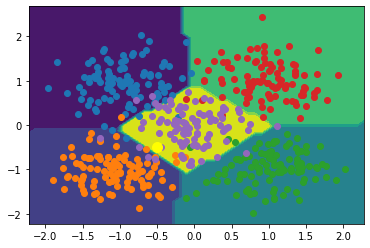

In [60]:
plot_decision_boundary(X, y_cat, model)
plt.scatter(X[y == 0, 0], X[y==0, 1])
plt.scatter(X[y == 1, 0], X[y==1, 1])
plt.scatter(X[y == 2, 0], X[y==2, 1])
plt.scatter(X[y == 3, 0], X[y==3, 1])
plt.scatter(X[y == 4, 0], X[y==4, 1])

x = -0.5
y = -0.5
 
point = np.array([[x, y]])
prediction = model.predict_classes(point)
plt.plot([x], [y], marker='o', markersize=10, color="yellow")
print("Prediction is: ", prediction)